# Presentation n°2: Multi-Layer Perceptrons (MLP) 
 Presented by: Mohamed Oussema BEN SLIMA - Ons BOUSBIH

In this notebook we will try to explore the MLP algorithm and apply it to the pyrat game in order to build  model that predicts the winner of the game based on the initial maze configuration.

In [92]:
#IMPORTS

## I- Multi-Layer Perceptrons:

Multilayer Perceptrons (MLP) are a class of feedforward artificial neural networks composed of multiple fully connected (FC) layers of nodes.

The network is composed of:

- <font color='green'>An input layer:</font> Receives input features.
- <font color='green'>Hidden layers:</font> Intermediate layers that transform input data into a form that the output layer can use ( these are the computational core of the algorithm)
- <font color='green'>Output layer:</font> Produces the final output.
- <font color='green'>Activation Function:</font> Typically, nonlinear activation functions like ReLU (Rectified Linear Unit) are used in hidden layers, while the output layer may use different activation functions based on the task (e.g., softmax for classification, linear for regression).

<div style="display:flex;">
  <img src='https://miro.medium.com/v2/resize:fit:563/1*4_BDTvgB6WoYVXyxO8lDGA.png' alt="Architecture of MLP" style="width:50%;">
  <img src='https://www.nomidl.com/wp-content/uploads/2022/04/image-10.png' style="width:50%;">
</div>



There are 3 steps that are repeated iteratively to train the model:  

<font color='green'>1- Feedforward Mechanism:</font>  

- Each layer feeds its computation results to the next layer.  
- Information flows through hidden layers to the output layer.  

<font color='green'>2- Error estimation:</font>
- Predictions (outputs) are compared to the actual targets (ground-truth data).  
- The error or loss is calculated using a predefined loss function, such as mean squared error (MSE) for regression tasks or cross-entropy loss for classification tasks.

<font color='green'>3- Backpropagation:</font>
- It is the learning mechanism for MLP, adjusts weights iteratively in order to minimize the loss function.  
- The error is propagated backward through the network.  
- The partial derivatives of the loss function with respect to each weight and bias in the network are computed.  
- Gradient Descent is used for optimization.  


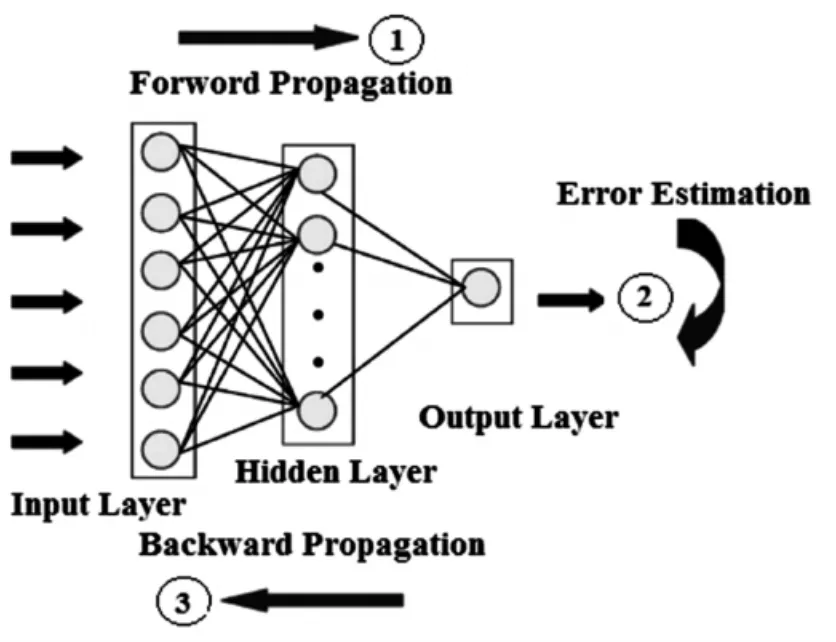


## II- MLP for classifying simulated data:

Let's use the iris data set available on scikit-learn to assess the performance of the MLP Classifier.  
It is is a classic and very easy multi-class classification dataset.

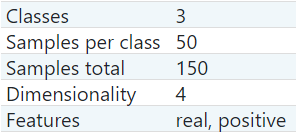


Features: 
- sepal length in cm

- sepal width in cm

- petal length in cm

- petal width in cm

Class:
- Iris-Setosa

- Iris-Versicolour

- Iris-Virginica

In [93]:
from sklearn.datasets import make_blobs, load_iris
# we upload the iris dataset and select 3 pairs of features in 3 different x variables to use in the classification. 
iris=load_iris()
x,y=iris.data,iris.target
print(x.shape)
# feature 1 and 2
x_1=x[:,0:2]
# feature 2 and 3
x_2=x[:,1:3]
# feature 3 and 4
x_3=x[:,2:4]


(150, 4)


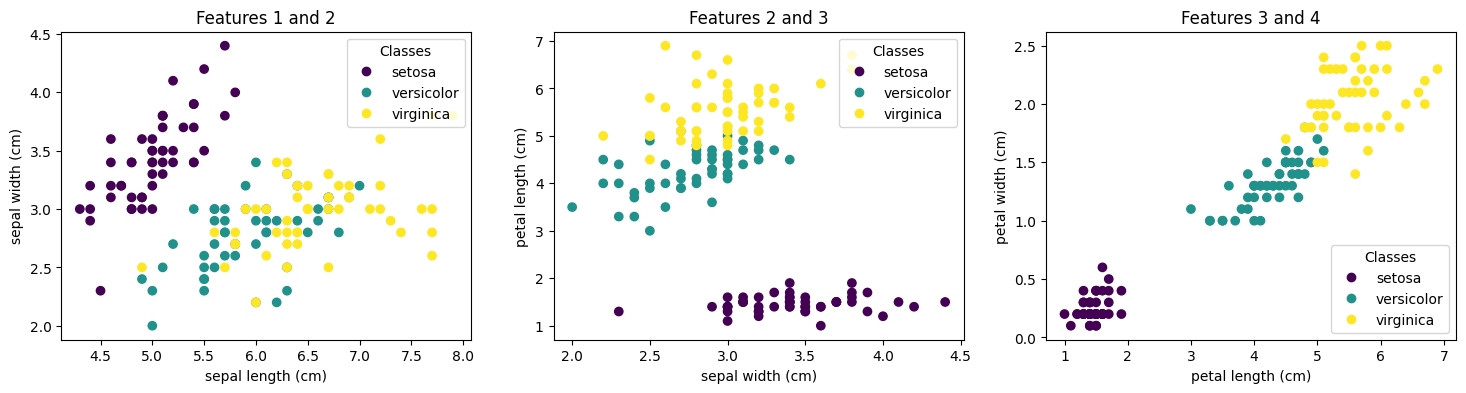

In [94]:
import matplotlib.pyplot as plt
# we visualize the distribution of the data according to the 3 pairs of features 
plt.figure(figsize=(18, 4))
plt.subplot(1,3,1)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Features 1 and 2")
scatter=plt.scatter(x_1[:,0],x_1[:,1],c=y)
plt.legend(scatter.legend_elements()[0], iris.target_names, loc="upper right", title="Classes")
plt.subplot(1,3,2)  
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.title("Features 2 and 3")
scatter=plt.scatter(x_2[:,0],x_2[:,1],c=y)
plt.legend(scatter.legend_elements()[0], iris.target_names, loc="upper right", title="Classes")
plt.subplot(1,3,3)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title("Features 3 and 4")
scatter=plt.scatter(x_3[:,0],x_3[:,1],c=y)
plt.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

In [ ]:
import tqdm
import numpy as np
import ast
import os
import sys
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
import numpy as np

In [ ]:
import tqdm
import numpy as np
import ast
import os
import sys
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
import numpy as np

In [ ]:
import tqdm
import numpy as np
import ast
import os
import sys
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
import numpy as np

In [95]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x_1,y,test_size=0.2,train_size=0.8,random_state=0)
x2_train,x2_test,y2_train,y2_test=train_test_split(x_2,y,test_size=0.2,train_size=0.8,random_state=0)   
x3_train,x3_test,y3_train,y3_test=train_test_split(x_3,y,test_size=0.2,train_size=0.8,random_state=0)       

In [103]:

from sklearn.neural_network import MLPClassifier
# we create 3 classifiers, one for each pair of features a,d train them with the training data
classifier1 = MLPClassifier(max_iter=1000)
classifier2 = MLPClassifier(max_iter=1000)
classifier3 = MLPClassifier(max_iter=1000)
classifier1.fit(x1_train,y1_train)
classifier2.fit(x2_train,y2_train)
classifier3.fit(x3_train,y3_train)  
y1_pred=classifier1.predict(x1_test)
y2_pred=classifier2.predict(x2_test)
y3_pred=classifier3.predict(x3_test)



0.7333333333333333
0.9666666666666667
0.9666666666666667


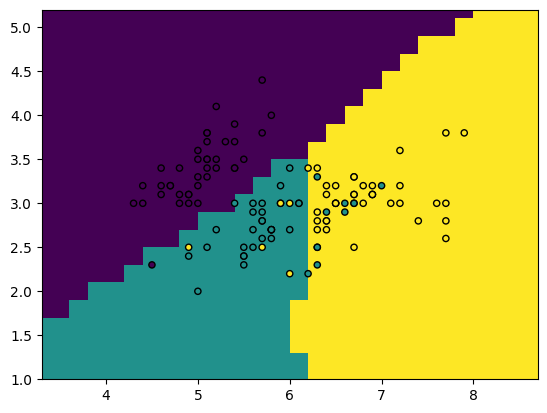

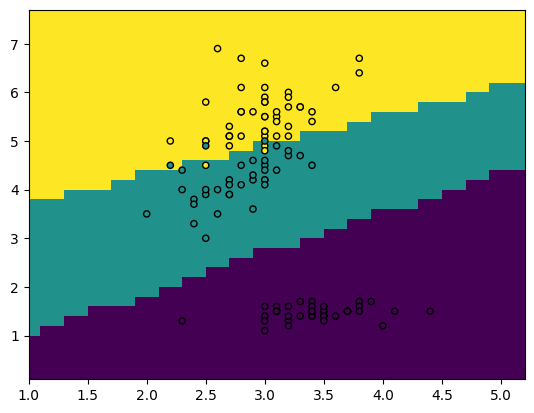

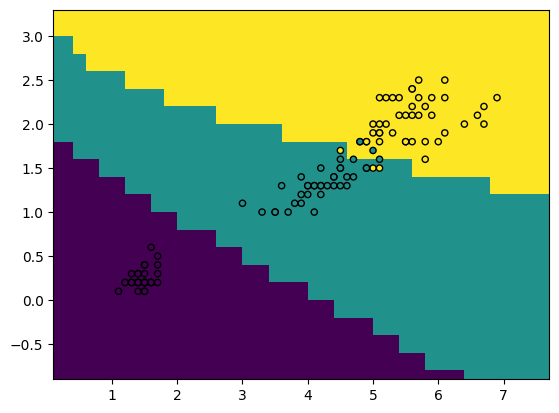

In [104]:
from matplotlib.colors import ListedColormap
import numpy as np
# we define a function to plot the decision boundaries of the classifiers
def plot_boundaries(classifier,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
# we plot the decision boundaries of the classifiers and print their accuracy
print(classifier1.score(x1_test,y1_test))
plot_boundaries(classifier1,x1_train,y1_train)
print(classifier2.score(x2_test,y2_test))
plot_boundaries(classifier2,x2_train,y2_train)
print(classifier3.score(x3_test,y3_test))
plot_boundaries(classifier3,x3_train,y3_train)

==> We can say that the couple of features: (petal length, sepal width) and ( petal length, petal width) enable a better classification.

- What if we use the MLPClassifier on the whole dataset (use all the features)?

In [105]:
classifier=MLPClassifier(max_iter=1000)
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=0) 
classifier.fit(x_train,y_train)
print('test_accuracy=',classifier.score(x_test,y_test))
print('train_accuracy=',classifier.score(x_train,y_train))


test_accuracy= 0.9666666666666667
train_accuracy= 1.0


In [102]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=classifier.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.92      0.96        37
           2       0.94      1.00      0.97        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

[[39  0  0]
 [ 0 34  3]
 [ 0  0 44]]


Il faut analyse ça plus tard!!!

- Let's test the effect of different hyperparameters on the classification, and try to obtain better scores for the worst case that we obtained (classification with features 1 and 2 )

In [ ]:
#We change the number of hidden layers
# default parameters: MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)[source]

## III- MLP on Pyrat:

In [113]:
import tqdm
import numpy as np
import ast
import os
import sys
#sys.path.append("../../session1/lab/")
#to 
# avoid conflict between j notebook and pyrat arguments
sys.argv=['']
del sys
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
import numpy as np

In [114]:
import pyrat
import simulate_matches_2_opponents as simulations
import AI.greedy as greedy_player
import AI.random as random_player

program_1 = greedy_player 
program_2 = greedy_player # You may want to test with the random player.


ModuleNotFoundError: No module named 'simulate_matches_2_opponents'

In [ ]:
nb_games = 10

nb_cheese = 4
maze_width = 5
maze_height = 7

x, y = simulations.run_several_games(program_1, program_2, nb_cheese = nb_cheese,
                                                                  maze_width = maze_width, maze_height = maze_height, 
                                                                  nb_games = nb_games, gui = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#print(f"Cheeses matrix: {cheeses_10_games}")
print(f"Winners: {winners_10_games}")
classifier = MLPClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred.shape)
classifier.score(x_test,y_test)

In [ ]:
#Best optimizer
import math
list_optimizers = [‘lbfgs’, ‘sgd’, ‘adam’]
train_accuracy_list, test_accuracy_list = [],[]
for optimizer in list_optimizers:
    classifier = MLPClassifier(solver = optimizer)
    classifier.fit(x_train,y_train)
    train_accuracy_list.append(classifier.score(x_train,y_train))
    test_accuracy_list.append(classifier.score(x_test,y_test))
train_highest_accuracy = max(train_accuracy_list)
test_highest_accuracy = max(test_accuracy_list)
print("The optimizer with highest train accuracy: ", list_optimizers[train_accuracy_list.index(train_highest_accuracy)]," with accuracy = ",train_highest_accuracy)
print("The optimizer with highest test accuracy: ", list_optimizers[test_accuracy_list.index(test_highest_accuracy)]," with accuracy = ",test_highest_accuracy)

In [ ]:
#Best activation function
L = [identity’, ‘logistic’, ‘tanh’, ‘relu’]
train_acc_list, test_acc_list = [],[]
for i in L:
    train_activation, test_activation = [], []
    for j in range (15,30):
        classifier = MLPClassifier(hidden_layer_sizes=(j,),activation = i)
        classifier.fit(x_train,y_train)
        train_activation.append(classifier.score(x_train,y_train)
        test_activation.append(classifier.score(x_test,y_test)
    train_acc_list.append(train_activation)
    test_acc_list.append(test_activation)
x_axis = [i for i in range(15,30)]
i=0
for y_axis in train_acc_list:
        plt.plot(x_axis,y_axis,label='L[i]', marker='o')
        i++
plt.title("Best activation function - Train accuracy")
plt.xlabel("Hidden layers")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()
i=0
for y_axis in test_acc_list:
        plt.plot(x_axis,y_axis,label='L[i]', marker='o')
        i++
plt.title("Best activation function - Test accuracy")
plt.xlabel("Hidden layers")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
        